Deep Neural Network implemented from scratch on Image recognition dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from deep_neural_network import DeepNN

Images dataset of cats, our ANN will learn how to identify cats.

In [2]:
train_data = h5py.File('train_catvnoncat.h5')
valid_data = h5py.File('test_catvnoncat.h5')

Three channels are there in one image of size 64 by 64 pixels, R, G and B. Below is the Red channel values for all 64 * 64 pixels for first image

In [3]:
train_data['train_set_x'][0][:,:,0]

array([[17, 22, 25, ...,  1,  1,  1],
       [25, 28, 30, ...,  1,  1,  2],
       [32, 34, 35, ...,  1,  0,  1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

We will represent each image as a flattened vector of size 64 by 64 by 3

In [4]:
train_features = (1/255) * train_data['train_set_x'][:].reshape(len(list(train_data['train_set_x'])),-1)
valid_features = (1/255) * valid_data['test_set_x'][:].reshape(len(list(valid_data['test_set_x'])),-1)
train_targets = train_data['train_set_y'][:].reshape(len(list(train_data['train_set_y'])),1).astype(float)
valid_targets = valid_data['test_set_y'][:].reshape(len(list(valid_data['test_set_y'])),1).astype(float)


In [5]:
#Normalize the input features, set them to zero mean and unit variance
#We will use the same transformation for the validation set
means = np.mean(train_features,axis=0).reshape(1,train_features.shape[1])
std_dev = np.std(train_features,axis = 0).reshape(1,train_features.shape[1])
train_features = train_features - means
train_features = train_features/std_dev
valid_features = valid_features - means
valid_features = valid_features/std_dev

In [6]:
train_features[1]

array([ 1.34624769,  1.30374977,  1.30231398, ..., -0.04323738,
       -0.11865024,  0.1694557 ])

In [7]:
print("Training set shape:" + str(train_features.shape))
print("Validation set shape:" + str(valid_features.shape))
print("Train targets shape :" + str(train_targets.shape))
print("Validation set targets shape: "  + str(valid_targets.shape))

Training set shape:(209, 12288)
Validation set shape:(50, 12288)
Train targets shape :(209, 1)
Validation set targets shape: (50, 1)


In [9]:
dnn = DeepNN(num_layers=3,units = [12288,7,1],activation_fns=['relu','sigmoid'])
result_dict = dnn.train_NN(train_features,train_targets,2500,0.0075,valid_features,valid_targets)
#np.divide(train_targets,np.log(dnn.forward_prop(train_features)[0])) - np.divide(1-train_targets,np.log(1-dnn.forward_prop(train_features)[0]))

Epoch 100
Training Cost: 0.5456114769600717------------Validation cost: 0.7942200343130573
Training Accuracy: 0.69377990430622
Validation Accuracy: 0.42
-----------------------------------------------------------
Epoch 200
Training Cost: 0.44562309157310126------------Validation cost: 0.8772736149668299
Training Accuracy: 0.7942583732057417
Validation Accuracy: 0.46
-----------------------------------------------------------
Epoch 300
Training Cost: 0.3364221048182857------------Validation cost: 1.0234457307087708
Training Accuracy: 0.8660287081339713
Validation Accuracy: 0.56
-----------------------------------------------------------
Epoch 400
Training Cost: 0.239865780041478------------Validation cost: 1.147733065470214
Training Accuracy: 0.9186602870813397
Validation Accuracy: 0.54
-----------------------------------------------------------
Epoch 500
Training Cost: 0.16661191044882223------------Validation cost: 1.2689345587074063
Training Accuracy: 0.9425837320574163
Validation Ac

The training is a bit haphazard but training accuracy gets to 98% and validation accuracy to 64%, lets make the network more deep

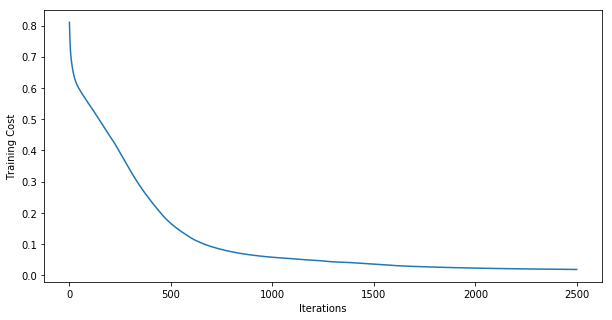

In [10]:
#plotting costs vs iterations
plt.figure(figsize=(10,5))
plt.plot(range(2500),result_dict['Training cost'])
plt.xlabel("Iterations")
plt.ylabel("Training Cost")
plt.show()

In [8]:
#Model with different configuration
dnn_2 = DeepNN(num_layers=5,units = [12288,20,7,5,1],activation_fns=['relu','relu','relu','sigmoid'])
result_dict2 = dnn_2.train_NN(train_features,train_targets,3000,0.01,valid_features,valid_targets)

Epoch 100
Training Cost: 0.6531180124847605------------Validation cost: 0.7635565598983797
Training Accuracy: 0.6555023923444976
Validation Accuracy: 0.34
-----------------------------------------------------------
Epoch 200
Training Cost: 0.6341266111565022------------Validation cost: 0.8303536172965406
Training Accuracy: 0.6555023923444976
Validation Accuracy: 0.34
-----------------------------------------------------------
Epoch 300
Training Cost: 0.6195264824335073------------Validation cost: 0.8323022371633562
Training Accuracy: 0.6555023923444976
Validation Accuracy: 0.34
-----------------------------------------------------------
Epoch 400
Training Cost: 0.5993132875516082------------Validation cost: 0.8301408853485218
Training Accuracy: 0.6555023923444976
Validation Accuracy: 0.34
-----------------------------------------------------------
Epoch 500
Training Cost: 0.5676614461004512------------Validation cost: 0.8474467918619442
Training Accuracy: 0.6555023923444976
Validation 

The training accuracy tends to 100% but the validation accuracy is 68%. 

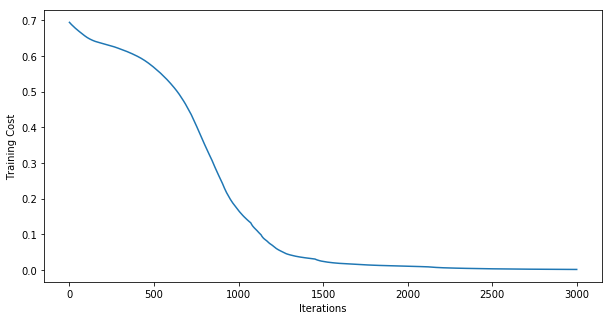

In [9]:
plt.figure(figsize=(10,5))
plt.plot(range(3000),result_dict2['Training cost'])
plt.xlabel("Iterations")
plt.ylabel("Training Cost")
plt.show()

With proper yperparameter selection, we can improve the validation accuracy